In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/raw/SuperStoreOrders.csv")

# Preview data
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [6]:
df.shape

(51290, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [8]:
# Remove commas/dollar signs and convert to float
df['sales'] = df['sales'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/nz/xr9cwnmn4ln__b_sd5vm8xc00000gn/T/ipykernel_98796/3512828618.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['sales'] = df['sales'].replace('[\$,]', '', regex=True).astype(float)


In [10]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [11]:
# Standardise column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [12]:
df['order_date'].unique()[:20]

array(['1/1/2011', '2/1/2011', '3/1/2011', '4/1/2011', '5/1/2011',
       '6/1/2011', '7/1/2011', '8/1/2011', '9/1/2011', '10/1/2011',
       '11/1/2011', '12/1/2011', '13-01-2011', '14-01-2011', '15-01-2011',
       '16-01-2011', '17-01-2011', '18-01-2011', '19-01-2011',
       '20-01-2011'], dtype=object)

In [13]:
df['ship_date'].unique()[:20]

array(['6/1/2011', '8/1/2011', '5/1/2011', '3/1/2011', '9/1/2011',
       '7/1/2011', '11/1/2011', '10/1/2011', '13-01-2011', '12/1/2011',
       '14-01-2011', '15-01-2011', '16-01-2011', '18-01-2011',
       '17-01-2011', '19-01-2011', '20-01-2011', '21-01-2011',
       '22-01-2011', '23-01-2011'], dtype=object)

In [14]:
# Convert date columns using both date formats
# Handle order_date
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)
mask_missing = df['order_date'].isnull()
df.loc[mask_missing, 'order_date'] = pd.to_datetime(df.loc[mask_missing, 'order_date'], errors='coerce', dayfirst=False)

# Handle ship_date
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce', dayfirst=True)
mask_missing = df['ship_date'].isnull()
df.loc[mask_missing, 'ship_date'] = pd.to_datetime(df.loc[mask_missing, 'ship_date'], errors='coerce', dayfirst=False)

In [15]:
# Drop rows where both dates are still missing
df.dropna(subset=['order_date', 'ship_date'], inplace=True)

In [16]:
df['order_month'] = df['order_date'].dt.to_period('M')
df['order_quarter'] = df['order_date'].dt.to_period('Q')

In [17]:
# Calculate shipping duration in days
df['ship_duration'] = (df['ship_date'] - df['order_date']).dt.days

/var/folders/nz/xr9cwnmn4ln__b_sd5vm8xc00000gn/T/ipykernel_98796/3858630554.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='category', y='sales', estimator='sum', ci=None)


Text(0.5, 1.0, 'Total Sales by Category')

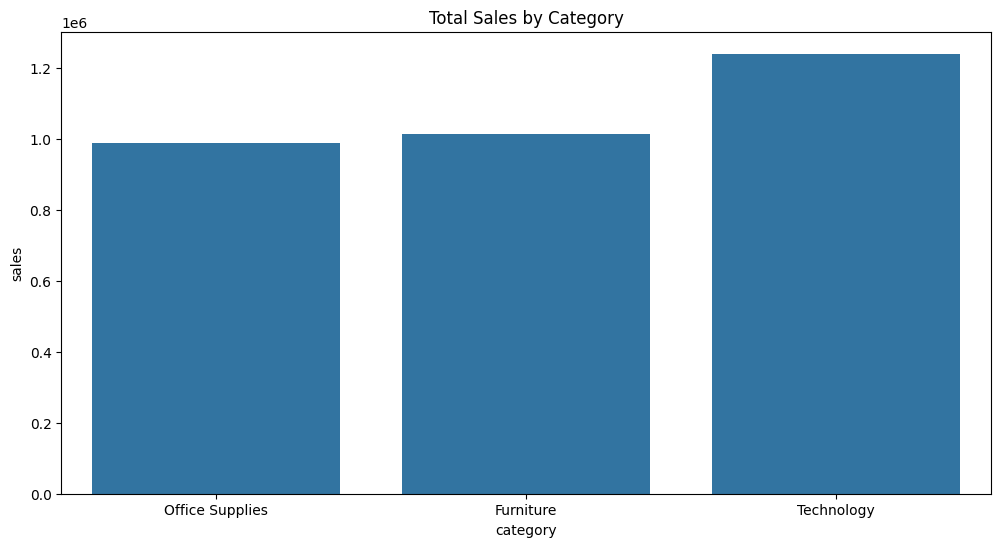

In [18]:
# Sales / Profit by Category & Sub-Category
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='category', y='sales', estimator='sum', ci=None)
plt.title('Total Sales by Category')

Text(0.5, 1.0, 'Shipping Duration Distribution')

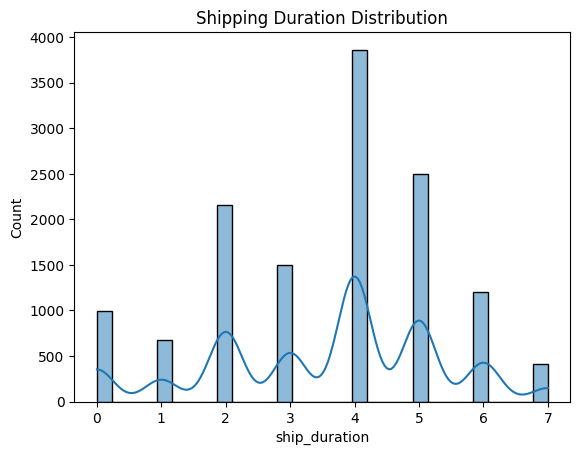

In [19]:
# Shipping Duration Distribution
sns.histplot(df['ship_duration'], bins=30, kde=True)
plt.title('Shipping Duration Distribution')

Text(0.5, 1.0, 'Profit vs Sales by Category')

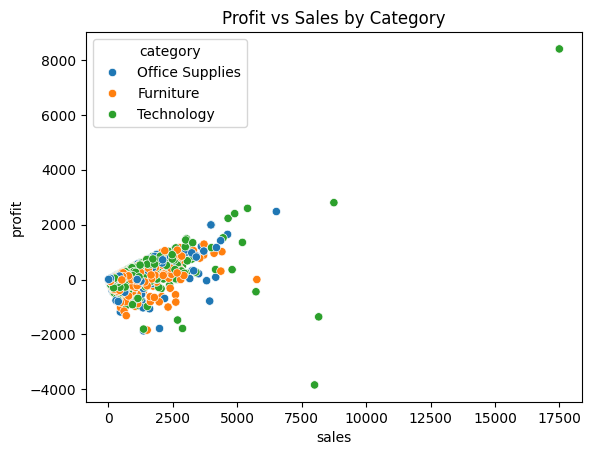

In [20]:
# Profitability: Profit vs Sales
sns.scatterplot(data=df, x='sales', y='profit', hue='category')
plt.title('Profit vs Sales by Category')

Text(0.5, 1.0, 'Shipping Duration by Mode')

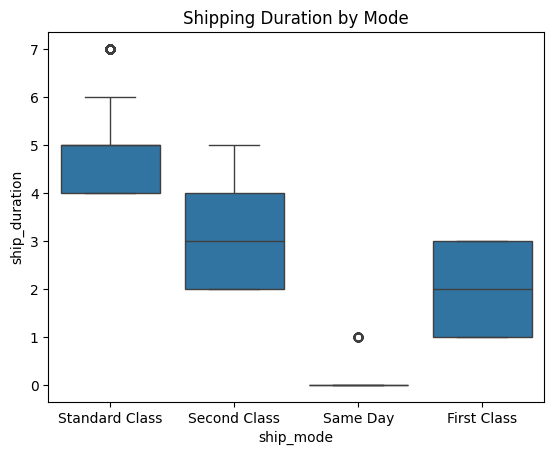

In [21]:
# Shipping Mode Analysis
sns.boxplot(data=df, x='ship_mode', y='ship_duration')
plt.title('Shipping Duration by Mode')